In [1]:
# Importing all the required modules
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import torch.nn.functional as F
from torch import nn,optim
from torchvision import datasets, transforms

from matplotlib import pyplot as plt

In [2]:
# Defining the transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load training and testing data
train = datasets.MNIST('./data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)

test = datasets.MNIST('./data', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=True)

In [3]:
# Defining the model
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)
        
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.log_softmax(self.fc3(x), dim=1))
        
        return x

model = Classifier()
print(model)

Classifier(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [4]:
# Defining the optimizer and the Loss function
optimizer = optim.SGD(model.parameters(), lr=0.03)
criterion = nn.NLLLoss()

In [5]:
epochs = 10
training_loss, testing_loss = [], []

for e in range(epochs):
    running_loss = 0
    for image, label in trainloader:
        optimizer.zero_grad()
        
        output = model.forward(image)
        loss = criterion(output, label)
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad():
            model.eval()         # Disabling dropouts for validation

            for image, label in testloader:
                output = model.forward(image)
                test_loss += criterion(output, label)
                
                ps = torch.exp(output)
                top, top_class = ps.topk(1, dim=1)
                equals = (top_class == label.view(top_class.shape))
                
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        model.train()           # Getting back to training parameters
        
    training_loss.append(running_loss/len(trainloader))
    testing_loss.append(test_loss/len(testloader))
    print(f"Epochs: {e+1}/{epochs}.. Training Loss: {running_loss/len(trainloader):3f}.. Testing Loss: {test_loss/len(testloader):3f}.. Accuracy: {accuracy/len(testloader)*100:3f}\n")

Epochs: 1/10.. Training Loss: 0.678727.. Testing Loss: 0.309329.. Accuracy: 91.023087

Epochs: 2/10.. Training Loss: 0.301686.. Testing Loss: 0.224371.. Accuracy: 92.904060

Epochs: 3/10.. Training Loss: 0.232194.. Testing Loss: 0.173157.. Accuracy: 94.685509

Epochs: 4/10.. Training Loss: 0.188868.. Testing Loss: 0.153007.. Accuracy: 95.461784

Epochs: 5/10.. Training Loss: 0.159706.. Testing Loss: 0.129778.. Accuracy: 96.098724

Epochs: 6/10.. Training Loss: 0.141604.. Testing Loss: 0.114723.. Accuracy: 96.307724

Epochs: 7/10.. Training Loss: 0.124525.. Testing Loss: 0.103058.. Accuracy: 96.755577

Epochs: 8/10.. Training Loss: 0.111707.. Testing Loss: 0.092341.. Accuracy: 97.084000

Epochs: 9/10.. Training Loss: 0.101672.. Testing Loss: 0.091815.. Accuracy: 97.034233

Epochs: 10/10.. Training Loss: 0.091900.. Testing Loss: 0.085117.. Accuracy: 97.273087



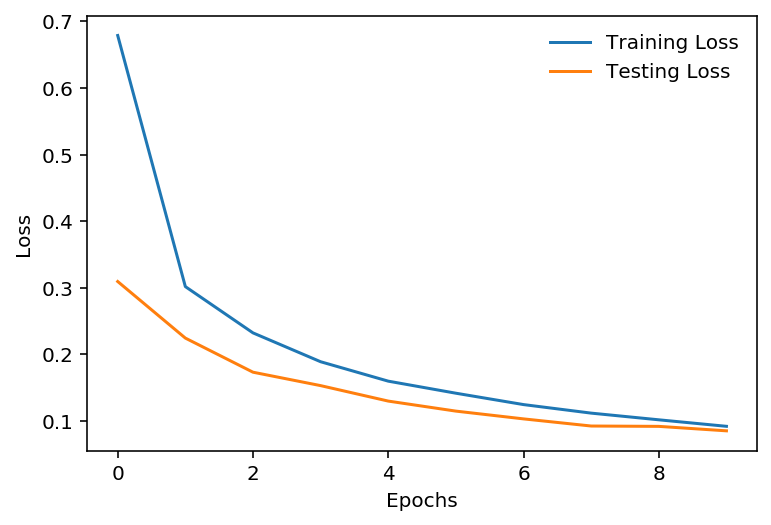

In [6]:
# Plotting Loss vs Epochs

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.plot(training_loss, label="Training Loss")
plt.plot(testing_loss, label="Testing Loss")
plt.legend(frameon=False)